In [1]:
import numpy as np
import pandas as pd
from dstk.utils.data_cleaning import clean_columns

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (9,6)
np.set_printoptions(suppress=True)
pd.options.display.max_columns = 150


FILES:

    - application_test.csv.zip
    - application_train.csv.zip

In [3]:
col_des = pd.read_csv('HomeCredit_columns_description.csv', encoding='latin-1')
col_des.shape

(219, 5)

In [4]:
col_des.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [5]:
col_des.Table.unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

## Cleaning
 
 
   - Examine Distribution of Target (check for imbalanced classes)
   - Examine Column Types
   - Remove/Impute Anomalies
     - You can also create a categorical value (0,1) for whether or not the data was anomalous.
   - Fill Missing Variables
   - Label Encode binary features and OHE multiple categorical ftrs
     - _Make sure to drop categories that are not in the test set!_
     - check out df.align?
   - Look for correlations

## Applications

Main File

Contains main id. 1 Row is 1 loan.

In [7]:
app_train = pd.read_csv('raw_data/application_train.csv.zip', dtype= {'SK_ID_CURR':str})
app_test = pd.read_csv('raw_data/application_test.csv.zip', dtype= {'SK_ID_CURR':str})
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [8]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
list(
    zip(col_des[col_des.Table=='application_{train|test}.csv'].Row.tolist(),col_des[col_des.Table=='application_{train|test}.csv'].Description.tolist())
)

[('SK_ID_CURR', 'ID of loan in our sample'),
 ('TARGET',
  'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'),
 ('NAME_CONTRACT_TYPE', 'Identification if loan is cash or revolving'),
 ('CODE_GENDER', 'Gender of the client'),
 ('FLAG_OWN_CAR', 'Flag if the client owns a car'),
 ('FLAG_OWN_REALTY', 'Flag if client owns a house or flat'),
 ('CNT_CHILDREN', 'Number of children the client has'),
 ('AMT_INCOME_TOTAL', 'Income of the client'),
 ('AMT_CREDIT', 'Credit amount of the loan'),
 ('AMT_ANNUITY', 'Loan annuity'),
 ('AMT_GOODS_PRICE',
  'For consumer loans it is the price of the goods for which the loan is given'),
 ('NAME_TYPE_SUITE',
  'Who was accompanying client when he was applying for the loan'),
 ('NAME_INCOME_TYPE',
  'Clients income type (businessman, working, maternity leave,\x85)'),
 ('NAME_EDUCATION_TYPE', 'Level of highest education t

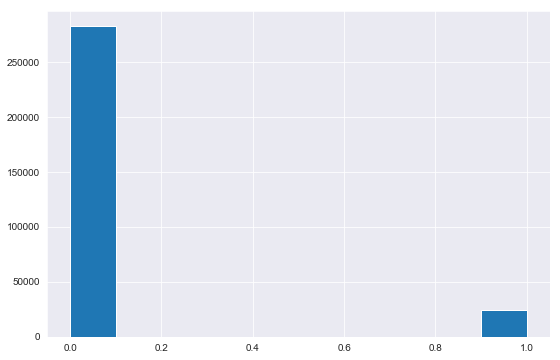

In [10]:
# Well damn
app_train.TARGET.hist()

In [11]:
app_train.groupby('CODE_GENDER').TARGET.sum()

CODE_GENDER
F      14170
M      10655
XNA        0
Name: TARGET, dtype: int64

Text(0.5,0,'Age Yrs')

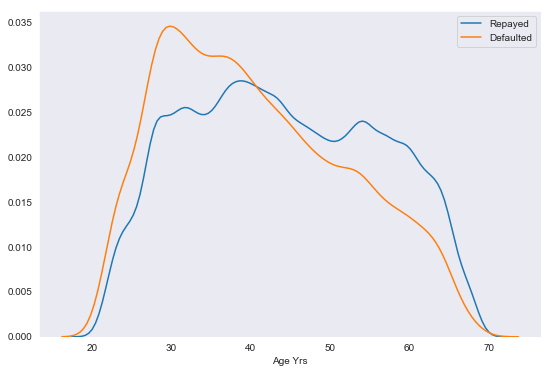

In [12]:
# young people tend to default at hire rates?
sns.kdeplot(app_train.loc[app_train.TARGET==0, 'DAYS_BIRTH']/-365, label = 'Repayed')
sns.kdeplot(app_train.loc[app_train.TARGET==1, 'DAYS_BIRTH']/-365, label = 'Defaulted')
plt.xlabel('Age Yrs')

### Clean Columns

In [13]:
# clean columns
app_train.columns = clean_columns(app_train)
app_test.columns = clean_columns(app_test)
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

### Check Column Types

In [14]:
def col_descrip(table, col):
    "Looks up column description for given table"
    print(table)
    print(col)
    return col_des.loc[(col_des.Table==table) & (col_des.Row==col.upper()), 
            'Description'].values[0]

In [15]:
app_train.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [16]:
pk = ['sk_id_curr']
tgt = ['target']
obj_cols = app_train.dtypes[app_train.dtypes=='object'].index.drop(pk).tolist()
int_cols = app_train.dtypes[app_train.dtypes=='int64'].index.tolist()
float_cols = app_train.dtypes[app_train.dtypes=='float64'].index.tolist()
indicator_cols = []


numeric_cols = int_cols + float_cols

In [17]:
# Some columns are already encoded
indicator_cols.extend(app_train[numeric_cols].nunique()[app_train[numeric_cols].nunique() == 2].index.tolist())
int_cols = [i for i in int_cols if i not in indicator_cols]
float_cols = [i for i in float_cols if i not in indicator_cols]


numeric_cols = int_cols + float_cols

In [18]:
# Target column separate
for c in tgt:
    indicator_cols.remove(c)


In [19]:
# not sure what to do about these :-/
# NOTE nunique() does NOT count nans!
app_train[numeric_cols].nunique()[app_train[numeric_cols].nunique() < 10]

region_rating_client           3
region_rating_client_w_city    3
def_60_cnt_social_circle       9
amt_req_credit_bureau_hour     5
amt_req_credit_bureau_day      9
amt_req_credit_bureau_week     9
dtype: int64

In [20]:
col_descrip('application_{train|test}.csv', 'region_rating_client')

application_{train|test}.csv
region_rating_client


'Our rating of the region where client lives (1,2,3)'

In [21]:
col_descrip('application_{train|test}.csv', 'amt_req_credit_bureau_day')

application_{train|test}.csv
amt_req_credit_bureau_day


'Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)'

In [22]:
col_descrip('application_{train|test}.csv', 'amt_req_credit_bureau_hour')

application_{train|test}.csv
amt_req_credit_bureau_hour


'Number of enquiries to Credit Bureau about the client one hour before application'

In [23]:
app_train['amt_req_credit_bureau_day'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

In [25]:
# all columns accounted for
len(pk) + len(tgt) + len(obj_cols) + len(indicator_cols) + len(int_cols) + len(float_cols), app_train.columns.shape[0]

(122, 122)

In [26]:
# Order the columns
app_train = app_train[pk + tgt + sorted(obj_cols) + sorted(indicator_cols) + sorted(int_cols) + sorted(float_cols)]
app_test = app_test[pk + sorted(obj_cols) + sorted(indicator_cols) + sorted(int_cols) + sorted(float_cols)]
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [27]:
# all columns that have ANY negative numbers
neg_cols = app_train[numeric_cols].loc[:,(app_train[numeric_cols] < 0).any(0)].columns

In [28]:
# make positive for interpretation sake
app_train[neg_cols] = app_train[neg_cols] * -1
app_test[neg_cols] = app_test[neg_cols] * -1

In [29]:
# Days employed has some negative some positive values
app_train[numeric_cols].loc[:,(app_train[numeric_cols] < 0).any(0)].columns

Index(['days_employed'], dtype='object')

In [30]:
# multiply just neg values by -1
app_train.loc[app_train['days_employed']<0, 'days_employed'] = app_train.loc[app_train['days_employed']<0, 'days_employed'] * -1

#### Anomalies

In [31]:
def anom_eval(df, col, filename):
    print(col_descrip(filename, col))
    print()

    max_diff_idx = df[col].sort_values().diff().nlargest(3).index
    max_diffs = df.loc[max_diff_idx, col]
    nlargest = df[col].nlargest()
    nsmallest = df[col].nsmallest()

    print('Max Diffs')
    print(max_diffs)
    print()
    print("Largest Vals")
    print(nlargest)
    print()
    print("Smallest Vals")
    print(nsmallest)
    df[col].hist()
    df[col].value_counts().sort_index()
    
    return max_diffs, nlargest

In [32]:
# col = 'amt_income_total'
# app_train[col].hist()

# sns.boxplot(app_train[col], whis=10)

# p25 = np.percentile(app_train[col], 25)
# p75 = np.percentile(app_train[col], 75)
# iqr = p75-p25

# max_val = p75 + 10*iqr
# min_val = p25 - 10*iqr

# app_train.loc[(app_train[col]>max_val) | (app_train[col]<min_val), col].unique()

Identify absurd outliers by looking at large jumps in data. 

These are for distributions where there are a subset of values WAY outside the normal range such as days_employed


In [33]:
gaps = app_train[numeric_cols].apply(lambda ser: ser.sort_values().diff().max()/ser.std())
gaps[gaps>2]

cnt_children                      6.924044
days_employed                     2.490832
amt_income_total                417.504202
cnt_fam_members                   4.392315
years_beginexpluatation_avg       2.433163
years_beginexpluatation_mode      5.227994
years_beginexpluatation_medi      6.310800
obs_30_cnt_social_circle        125.365019
def_30_cnt_social_circle         58.204816
obs_60_cnt_social_circle        124.800228
def_60_cnt_social_circle         46.923631
amt_req_credit_bureau_hour       11.926182
amt_req_credit_bureau_day        18.057483
amt_req_credit_bureau_week        4.885559
amt_req_credit_bureau_mon         3.275101
amt_req_credit_bureau_qrt       304.764534
dtype: float64

In [34]:
# From manual exploration, these are the columns with ridiculous outliers
cols = ['cnt_children',
        'days_employed',
        'amt_income_total',
        'cnt_fam_members',
        'obs_30_cnt_social_circle',
        'def_30_cnt_social_circle',
        'obs_60_cnt_social_circle',
        'def_60_cnt_social_circle',
        'amt_req_credit_bureau_qrt']

application_{train|test}.csv
cnt_children
Number of children the client has

Max Diffs
155369    19
176011    14
246270     1
Name: cnt_children, dtype: int64

Largest Vals
155369    19
265784    19
176011    14
183878    14
267998    14
Name: cnt_children, dtype: int64

Smallest Vals
0    0
1    0
2    0
3    0
4    0
Name: cnt_children, dtype: int64


(155369    19
 176011    14
 246270     1
 Name: cnt_children, dtype: int64, 155369    19
 265784    19
 176011    14
 183878    14
 267998    14
 Name: cnt_children, dtype: int64)

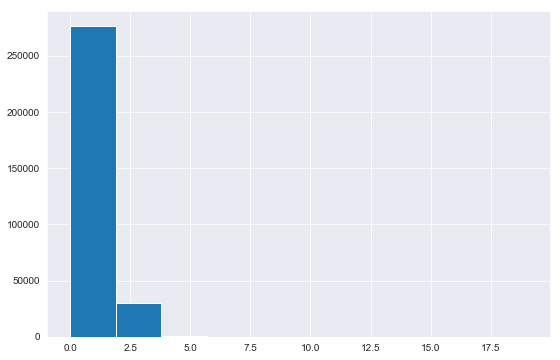

In [35]:
anom_eval(app_train, 'cnt_children', 'application_{train|test}.csv')

In [36]:
for col in cols:
    # Identify outliers by some threshold and replace them
    print(col)
    max_diff_idx = app_train[col].sort_values().diff().nlargest(1).index
    max_diff = app_train.loc[max_diff_idx, col].squeeze()
    denom = int(np.log10(max_diff))
    
    if denom < 2:
        # if we are only in the 10s palce leave it
        cutoff = max_diff
    else:
        # if we are greater than the 10s place round down
        cutoff = int(max_diff/(10**denom))*(10**denom)
    
    anoms_train = app_train.loc[app_train[col]>=cutoff, col]
    anoms_test = app_test.loc[app_test[col]>=cutoff,col]
    # fill with vals from train set
    rest = app_train.loc[~app_train.index.isin(anoms_train.index), col]
    
    # replace outliers with median from non-outlying training data
    app_train.loc[anoms_train.index, col] = rest.median()
    app_test.loc[anoms_test.index, col] = rest.median()
    
    # create identifier for anomalies
    app_train[col+'_anom'] = 0
    app_test[col+'_anom'] = 0
    app_train.loc[anoms_train.index, col+'_anom'] = 1
    app_test.loc[anoms_test.index, col+'_anom'] = 1
    
    # add to indicator columns
    indicator_cols.append(col+'_anom')

cnt_children
days_employed
amt_income_total
cnt_fam_members
obs_30_cnt_social_circle
def_30_cnt_social_circle
obs_60_cnt_social_circle
def_60_cnt_social_circle
amt_req_credit_bureau_qrt


#### Fill NAs

In [37]:
from sklearn.preprocessing import Imputer

In [38]:
def pct_null(df):
    null_counts = df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False).to_frame()
    if null_counts.empty:
        return None
    null_counts['pct_null'] = null_counts/df.shape[0]
    null_counts.columns = ['n_null', 'pct_null']
    return null_counts

In [39]:
# good that no null primary keys
app_train[pk].isnull().sum(), app_test[pk].isnull().sum()

(sk_id_curr    0
 dtype: int64, sk_id_curr    0
 dtype: int64)

For columns where less than 20% is null, i'm filling with the most-frequent value

For columns where most is null i'm filling with "missing" and this will get encoded as it's own category.

__NOTE__ A _better_ strategy would be to compute how much the target distributions differ for rows where the column is null and if it is distinctly different then label as "missing" so that it is predictive. Otherwise fill with most-frequent


_OBJECT COLS_

In [40]:
# Train
obj_nulls = pct_null(app_train[obj_cols])
fill_most_frequent = obj_nulls[obj_nulls.pct_null < 0.2].index.tolist()
fill_missing = obj_nulls.index.drop(fill_most_frequent)

In [41]:
modes = app_train[fill_most_frequent].mode().T.to_dict()[0]
app_train.fillna(modes, inplace=True)
app_train.fillna(dict.fromkeys(fill_missing,'MISSING'), inplace=True)

In [42]:
# Test
obj_nulls = pct_null(app_test[obj_cols])
fill_most_frequent = obj_nulls[obj_nulls.pct_null < 0.2].index.tolist()
fill_missing = obj_nulls.index.drop(fill_most_frequent)

In [43]:
# Note i'm filling with most-frequents from train data even for test missings
modes = app_train[fill_most_frequent].mode().T.to_dict()[0]
app_test.fillna(modes, inplace=True)

In [44]:
app_test.fillna(dict.fromkeys(fill_missing,'MISSING'), inplace=True)

_NUMERIC COLS_

In [45]:
# for numeric cols, just fill w median
medians = app_train[numeric_cols].median().squeeze()
app_train.fillna(medians, inplace=True)
app_test.fillna(medians, inplace=True)

### Convert Categorical Variables To Numeric

Label Encode binary categoricals and OHE other categoricals with multiple values

In [46]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [47]:
# first make sure no columns have only 1 value
app_train.columns[app_train.nunique() < 2]

Index([], dtype='object')

In [48]:
binary_cols = app_train[obj_cols].nunique()[app_train[obj_cols].nunique() ==2].index.tolist()
binary_cols

['name_contract_type', 'flag_own_car', 'flag_own_realty']

In [49]:
lcoder = LabelEncoder()
for col in binary_cols:
    print(col)
    # Check to make sure it's binary accross both test and train
    if not set(app_train[col].unique()) == set(app_test[col].unique()):
        print(f'{col} is not Binary!')
        print('Values in train:', set(app_train[col].unique()))
        print('Values in test:', set(app_train[col].unique()))
        continue
    app_train[col] = lcoder.fit_transform(app_train[col])
    app_test[col] = lcoder.transform(app_test[col])
    # don't forget to add it to indicator cols
    indicator_cols.append(col)
    obj_cols.remove(col)

name_contract_type
flag_own_car
flag_own_realty


In [50]:
# One hot encode
non_binary_cats = [col for col in obj_cols if col not in binary_cols]
non_binary_cats

['code_gender',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'occupation_type',
 'weekday_appr_process_start',
 'organization_type',
 'fondkapremont_mode',
 'housetype_mode',
 'wallsmaterial_mode',
 'emergencystate_mode']

In [51]:
for col in non_binary_cats:
    print(col)
    ohe_train = pd.get_dummies(app_train[col]) # drop_first?
    ohe_train.columns = col + '_' + ohe_train.columns
    
    ohe_test = pd.get_dummies(app_test[col]) # they might not align if I drop_first...
    ohe_test.columns = col + '_' + ohe_test.columns
    ohe_test = ohe_test.align(ohe_train, 'left', 1)[0].fillna(0) 
    
    # now drop first
    ohe_train.drop(ohe_train.columns[0], axis=1, inplace=True)
    ohe_test.drop(ohe_train.columns[0], axis=1, inplace=True) # should be the same first column, but just incase
    
    app_train = pd.concat([app_train, ohe_train], axis=1)
    app_test = pd.concat([app_test, ohe_test], axis=1)
    print(app_train.shape, app_test.shape)
    del app_train[col]
    del app_test[col]
    obj_cols.remove(col)
    indicator_cols.extend(ohe_train.columns)

code_gender
(307511, 133) (48744, 131)
name_type_suite
(307511, 138) (48744, 136)
name_income_type
(307511, 144) (48744, 141)
name_education_type
(307511, 147) (48744, 144)
name_family_status
(307511, 151) (48744, 147)
name_housing_type
(307511, 155) (48744, 151)
occupation_type
(307511, 172) (48744, 168)
weekday_appr_process_start
(307511, 177) (48744, 173)
organization_type
(307511, 233) (48744, 229)
fondkapremont_mode
(307511, 236) (48744, 232)
housetype_mode
(307511, 238) (48744, 234)
wallsmaterial_mode
(307511, 244) (48744, 240)
emergencystate_mode
(307511, 245) (48744, 241)


In [52]:
app_train.dtypes.value_counts()

uint8      126
float64     67
int64       50
object       1
dtype: int64

In [ ]:
app_train.to_csv('clean_data/app_train.csv',index=False)
app_test.to_csv('clean_data/app_test.csv',index=False)